## 1.Planejamento 

 - Fazer a previsão do crescimento dos procedimentos e faturamento nosmeses que duraram a quarentena

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importando e fazeendo um tratamento na base de dados

 - Importandos os daddos do Studio Biena Guedes

In [20]:
dados = pd.read_csv('https://raw.githubusercontent.com/robertferro/studio-estetica/main/dados-studio/dados_studio_biena_guedes.csv', sep=';')

In [21]:
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
0,2018-12-23,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,430.0
1,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-12-26,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,650.0
4,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,130.0


 - Excluindo os valores nulos

In [22]:
dados=dados.dropna()

In [23]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 728
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_atendimento        729 non-null    object 
 1   design_de_sobrancelhas  729 non-null    float64
 2   design_coloracao        729 non-null    float64
 3   design_coloracao_buco   729 non-null    float64
 4   buco                    729 non-null    float64
 5   brown_lamination        729 non-null    float64
 6   micropigmentacao        729 non-null    float64
 7   extensao_de_cilios      729 non-null    float64
 8   lash_lifting            729 non-null    float64
 9   limpeza_de_pele         729 non-null    float64
 10  microagulhamento        729 non-null    float64
 11  peeling_quimico         729 non-null    float64
 12  massagem_relaxante      729 non-null    float64
 13  pacote_massagem_5       729 non-null    float64
 14  drenagem_linfatica      729 non-null    fl

 - Convertendo a coluna "data_atendimento" para o formato datetime

In [24]:
dados['data_atendimento'] = pd.to_datetime(dados['data_atendimento'])

In [25]:
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
0,2018-12-23,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,430.0
1,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-12-26,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,650.0
4,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,130.0


## 3. EDA

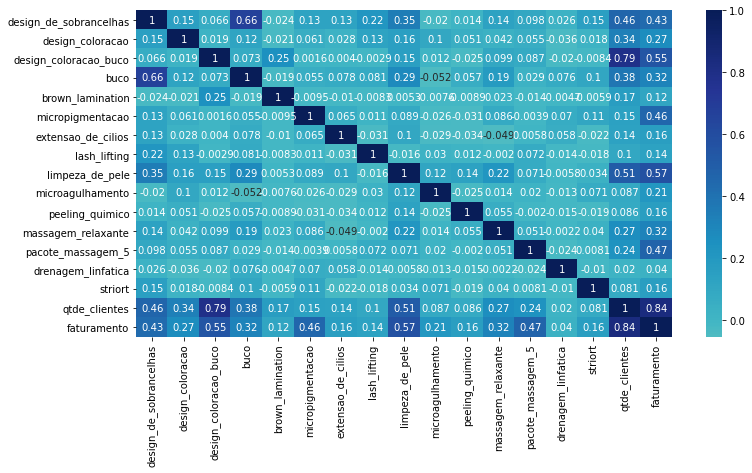

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(dados.corr(), annot=True, center=0, cmap="YlGnBu")

In [27]:
dados.corr()

,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
design_de_sobrancelhas,1.000000,0.153314,0.065894,0.664596,-0.023677,0.128832,0.125900,0.216663,0.348605,-0.020484,0.013896,0.137909,0.098465,0.025757,0.151765,0.462153,0.429694
design_coloracao,0.153314,1.000000,0.018660,0.123656,-0.020944,0.060991,0.027767,0.125295,0.155786,0.103779,0.050740,0.041875,0.054604,-0.035641,0.017704,0.336452,0.270752
design_coloracao_buco,0.065894,0.018660,1.000000,0.073108,0.251066,0.001647,0.004034,-0.002891,0.149158,0.012263,-0.025061,0.098967,0.086554,-0.019741,-0.008448,0.787625,0.550596
buco,0.664596,0.123656,0.073108,1.000000,-0.018971,0.055385,0.077546,0.080698,0.286227,-0.052425,0.056857,0.187347,0.029426,0.076048,0.104681,0.375505,0.316441
brown_lamination,-0.023677,-0.020944,0.251066,-0.018971,1.000000,-0.009498,-0.010376,-0.008259,0.005330,-0.007602,-0.008938,0.023257,-0.013859,-0.004682,-0.005864,0.171423,0.116459
micropigmentacao,0.128832,0.060991,0.001647,0.055385,-0.009498,1.000000,0.065273,0.011081,0.089359,-0.026248,-0.030859,0.085631,-0.003903,0.069534,0.110952,0.145884,0.460619
extensao_de_cilios,0.125900,0.027767,0.004034,0.077546,-0.010376,0.065273,1.000000,-0.031153,0.102152,-0.028675,-0.033712,-0.048549,0.005802,0.057842,-0.022118,0.135191,0.161542
lash_lifting,0.216663,0.125295,-0.002891,0.080698,-0.008259,0.011081,-0.031153,1.000000,-0.016134,0.029998,0.011980,-0.001954,0.072128,-0.014056,-0.017606,0.101286,0.135536
limpeza_de_pele,0.348605,0.155786,0.149158,0.286227,0.005330,0.089359,0.102152,-0.016134,1.000000,0.115299,0.139031,0.217749,0.071435,-0.005833,0.034178,0.510927,0.570612
microagulhamento,-0.020484,0.103779,0.012263,-0.052425,-0.007602,-0.026248,-0.028675,0.029998,0.115299,1.000000,-0.024699,0.014464,0.020326,-0.012937,0.071302,0.087474,0.210489


 - Agrupando os dados por mês

In [ ]:
# dados = dados.set_index('data_atendimento')
# dados_por_mes=dados.resample('M').sum()
# dados_por_mes=dados.resample('M', on='data_atendimento').sum()

In [29]:
dados.loc[dados['data_atendimento'] =="2020-04-01"]

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
377,2020-04-01,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,360.0


 ## 4. Machine learning
 
 
  
   -  Definir X_train e X_test : 
       - X_train são os dados antes da pandemia 
       - X_test são os dados após a pandemia
       - x prede sao os dados durante a pandemia 

 - Definindo as amostras de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train = dados[dados.index<'2020-03-01'].index.values
X_test = dados[dados.index>='2015-06-01'].index.values
y_train = dados[dados.index<'2015-06-01'].values
y_test = dados[dados.index>='2015-06-01'].values

In [ ]:
train, test= train_test_split(sobrancelhas, test_size=0.25 , random_state=123)

In [ ]:
train.info()

In [ ]:
test.info()

In [ ]:
X_cols = ['design_de_sobrancelhas', 'design_coloracao', 'design_coloracao_buco','buco','brown_lamination','micropigmentacao']
y_col = ['qtde_clientes']

In [ ]:
X_train = train[X_cols]
X_test = test[X_cols]
y_train = train[y_col]
y_test = test[y_col]

In [ ]:
X_train.head()

 - Machine learning

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

In [ ]:
y_pred = neigh.predict(X_test)

In [ ]:
# Root Mean Squared Error
np.sqrt(np.mean((y_pred-y_test.values)**2))

In [ ]:
# Mean Squared Error
np.mean((y_pred-y_test.values)**2)

In [ ]:
# Mean Absolute Error
np.mean(np.abs(y_pred-y_test.values))

In [ ]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

 - Triagem com outros modelos

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

regressor_list = [DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor()
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_train, y_train)
  train_score = reg.score(X_train, y_train)
  test_score = reg.score(X_test, y_test)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test= train_test_split(dados, test_size=0.25 , random_state=123)

In [ ]:
train.info()

In [ ]:
test.info()